# Law of Large Numbers vs. Maximum-Likelihood-Estimation: Speed of Convergence

Dieses Notebook generiert Samples aus einer Lognormalverteilung mit Erwartungswert E=3 und Varianz Var=1.5. Sowohl das arithmetische Mittel als auch das geometrische Mittel mit Korrekturfaktor konvergiert gegen den Erwartungswert. Der Korrekturfaktor wurde aus der Maximum-Likelihood-Estimation hergeleitet. Die Konvergenzgeschwindigkeit der beiden Approximationsmöglichkeiten wird verglichen. 

In [5]:
import numpy as np
import pandas as pd
from scipy.stats.mstats import gmean


n=10000 #number of random draws
E, Var = 3., 1.5 # mean and standard deviation

df=[]
for df_number in range(20):
    S = np.random.lognormal(E, Var, n) #log normal distributed
    log_S= np.log(S) # normal distributed 

    arithmetic_mean=[]
    geometric_mean=[]
    mu=[] #Max-Likelihood-Estimation of expectation value of log_S 
    sigma_squared=[] #Max-Likelihood-Estimation of variance of log_S 
    expectation_value_MLE=[] # expectation value according to Max-Likelihood-Estimation
    expectation_value=[] # True expectation value

    for i in range(n):
        arithmetic_mean.append(np.mean(S[:i+1]))
        geometric_mean.append(gmean(S[:i+1]))
        mu.append(np.mean(log_S[:i+1]))
        sigma_squared.append(np.mean((log_S[:i+1]-mu[i])**2))
        expectation_value_MLE.append(geometric_mean[i]*np.exp(sigma_squared[i]/2))
        expectation_value.append(np.exp(E+Var**2/2))
    df.append(pd.DataFrame(
        {'random_draw': S,
         'log_random_draw': log_S,
         'arithmetic_mean': arithmetic_mean,
         'geometric_mean': geometric_mean,
         'mu':mu,
         'sigma_squared': sigma_squared,
         'Expectation_value_MLE':expectation_value_MLE,
         'Expectation_value': expectation_value
        }))

In [6]:
df[0]

,random_draw,log_random_draw,arithmetic_mean,geometric_mean,mu,sigma_squared,Expectation_value_MLE,Expectation_value
0,7.068859,1.955699,7.068859,7.068859,1.955699,0.000000,7.068859,61.867809
1,1.431496,0.358720,4.250177,3.181044,1.157210,0.637585,4.375419,61.867809
2,29.259092,3.376190,12.586482,6.664999,1.896870,1.519251,14.246277,61.867809
3,11.748342,2.463712,12.376947,7.679699,2.038580,1.199684,13.991116,61.867809
4,194.500783,5.270436,48.801714,14.657492,2.684952,2.630930,54.620901,61.867809
...,...,...,...,...,...,...,...,...
9995,0.854988,-0.156668,62.509673,20.271987,3.009240,2.216830,61.415039,61.867809
9996,26.340048,3.271091,62.506055,20.272518,3.009266,2.216615,61.410049,61.867809
9997,14.794300,2.694242,62.501283,20.271879,3.009235,2.216403,61.401612,61.867809
9998,21.671893,3.076016,62.497199,20.272014,3.009241,2.216182,61.395231,61.867809


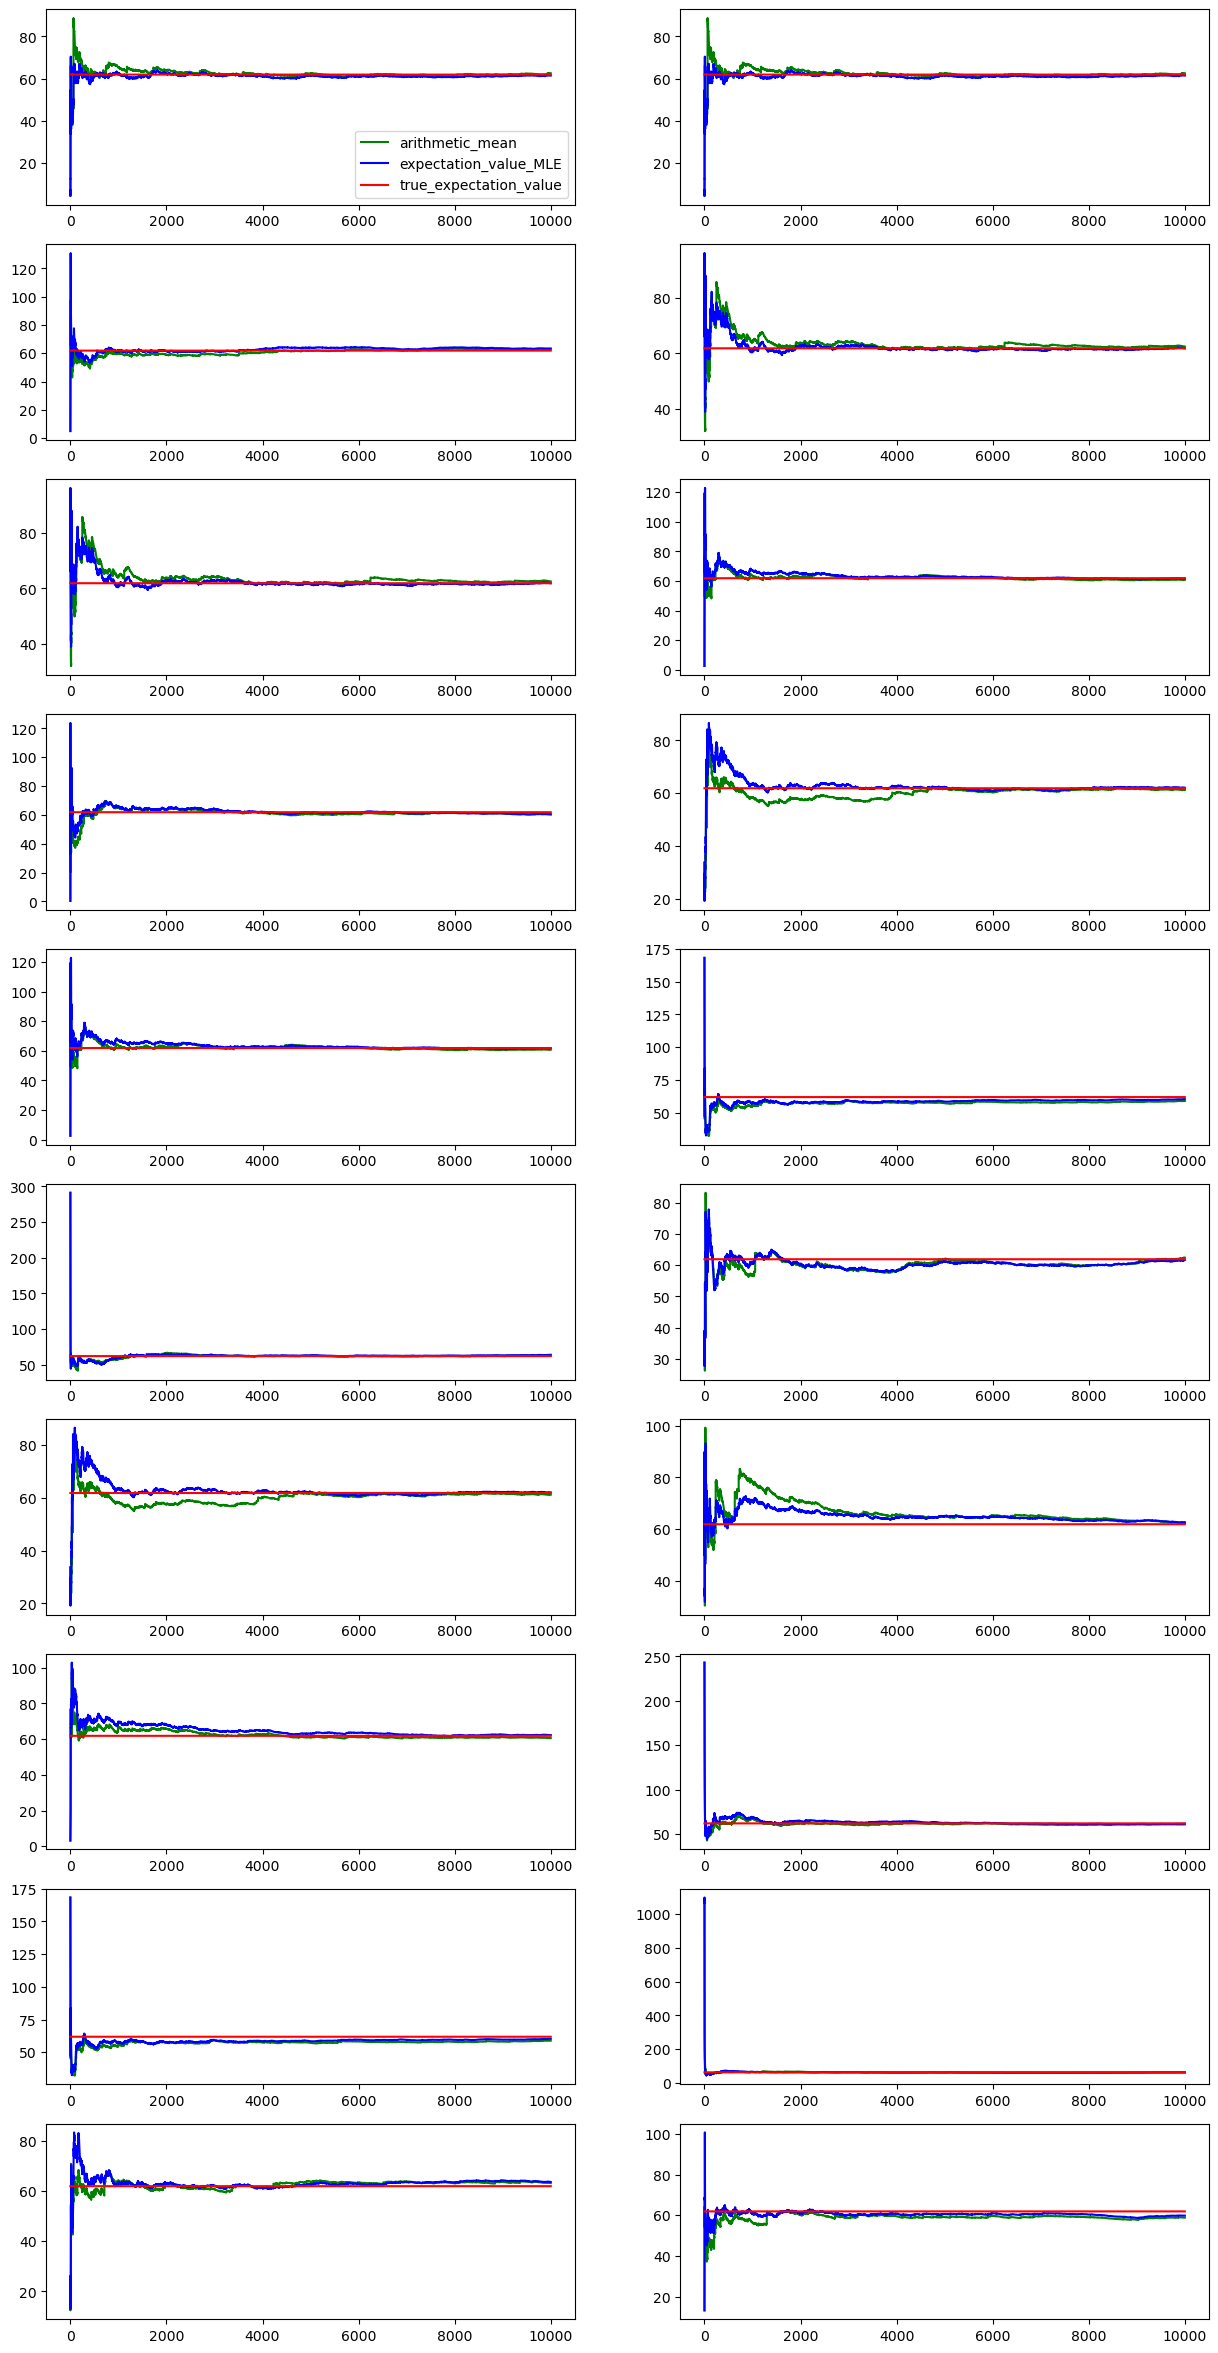

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axs = plt.subplots(10, 2,figsize=(15, 30))

for i in range(10):
    for j in range(2):
        k=i*(j+1)
        axs[i, j].plot(range(n), df[k]['arithmetic_mean'], 'g',label='arithmetic_mean')
        axs[i, j].plot(range(n), df[k]['Expectation_value_MLE'], 'b',label='expectation_value_MLE')
        axs[i, j].plot(range(n), df[k]['Expectation_value'], 'r', label='true_expectation_value')
        if (i,j)== (0,0):
            axs[i, j].legend(loc="lower right")


Die obigen Grafiken zeigen, dass der MLE-Schätzer ab einer Stichprobengröße von 1000 stabiler ist als das arithmetische Mittel. Dies wird in der Tabelle unten quantifiziert. Es werden die Schätzer für 1000 und 10000 Stichproben verglichen. 

In [9]:
std_MLE_head=[]
std_am_head=[]

std_MLE_tail=[]
std_am_tail=[]


for l in range(20):
    e1=np.array(df[l]['Expectation_value_MLE'])
    e=np.array(df[l]['Expectation_value'])
    e2=np.array(df[l]['arithmetic_mean'])

    std_MLE_head.append(np.std((e-e1)[:1000]))
    std_am_head.append(np.std((e-e2)[:1000]))
    
    std_MLE_tail.append(np.std((e-e1)[1000:]))
    std_am_tail.append(np.std((e-e2)[1000:]))

std_results=pd.DataFrame({'STD expectation_value_MLE_head':std_MLE_head,
             'STD arithmetic_mean_head':std_am_head,
             'STD expectation_value_MLE_tail':std_MLE_tail,
             'STD arithmetic_mean_tail':std_am_tail})

std_results['MLE is better for head']=std_results['STD expectation_value_MLE_head']-std_results['STD arithmetic_mean_head']
std_results['MLE is better for head']=[0 if x>0 else 1 for x in std_results['MLE is better for head']]

std_results['MLE is better for tail']=std_results['STD expectation_value_MLE_tail']-std_results['STD arithmetic_mean_tail']
std_results['MLE is better for tail']=[0 if x>0 else 1 for x in std_results['MLE is better for tail']]

std_results



,STD expectation_value_MLE_head,STD arithmetic_mean_head,STD expectation_value_MLE_tail,STD arithmetic_mean_tail,MLE is better for head,MLE is better for tail
0,5.563332,7.618792,0.607449,0.872404,1,1
1,5.692374,4.785784,1.089726,1.626656,0,1
2,5.908763,8.006388,0.562258,0.895314,1,1
3,6.929767,9.503323,1.325338,1.281351,1,0
4,6.553586,6.399349,1.284537,1.093186,0,0
5,9.387126,9.069913,0.593936,1.222840,0,1
6,8.524535,7.326248,0.616644,1.741376,0,1
7,7.034320,5.748626,2.033356,1.619370,0,0
8,7.533352,7.326065,0.787096,0.600797,0,0
9,7.466859,5.816414,0.880438,1.125353,0,1
